## Retail Store Sales Forecasting with Neural Networks 
## Double and Triple Exponential Smoothing

## By Yasaman Ensafi - 500913843
### Ryerson Data Science and Analytics (MSc)
#### 2019

## Import libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams
import itertools
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import sys

## Load Dataset

In [36]:
data= pd.read_excel('Sample_Superstore.xls')

## Edit columns names

In [37]:
# Lower case column names
data.columns = map(str.lower, data.columns)

#Replace spaces with '_'
data.columns = data.columns.str.replace(" ", "_")

data.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

## Separate dataframe of each category

In [38]:
df_furniture=data.loc[data['category'] == 'Furniture']

df_technology=data.loc[data['category'] == 'Technology']
df_office=data.loc[data['category'] == 'Office Supplies']

## Aggregating sales by date

In [39]:
furniture= df_furniture.groupby('order_date')['sales'].sum().reset_index()

technology= df_technology.groupby('order_date')['sales'].sum().reset_index()
office= df_office.groupby('order_date')['sales'].sum().reset_index()

In [40]:
#Set index 
furniture = furniture.set_index('order_date')

technology = technology.set_index('order_date')
office = office.set_index('order_date')

#set index for original datasets
df_furniture = df_furniture.set_index('order_date')

df_technology = df_technology.set_index('order_date')
df_office = df_office.set_index('order_date')

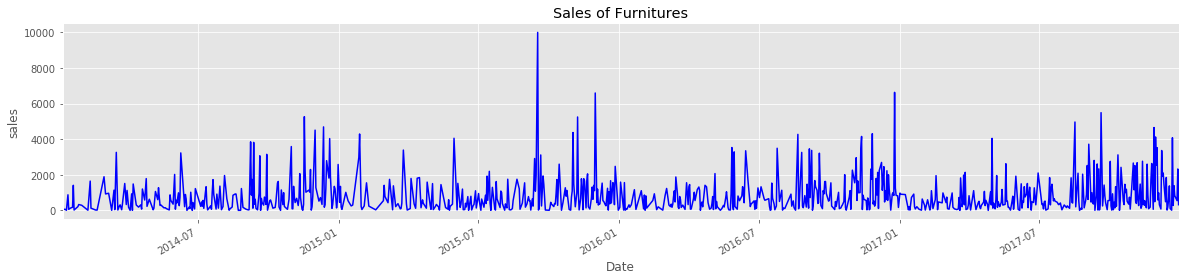

In [41]:
ax= furniture['sales'].plot(color='blue',figsize=(20,4))
ax.set_xlabel("Date")
ax.set_ylabel('sales')
ax.set_title("Sales of Furnitures")
plt.show()

In [42]:
# Using averages daily sales value - set start of the month as index
df = furniture['sales'].resample('MS').mean()
#df= avg_furniture_sales
#avg_technology_sales = technology_sales['sales'].resample('MS').mean()
#avg_office_sales = office_sales['sales'].resample('MS').mean()

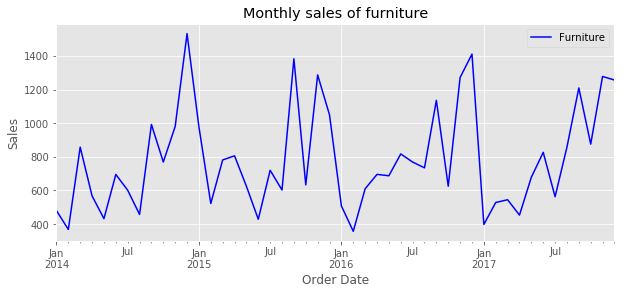

In [43]:
df.plot(figsize=(10, 4),color='blue',label = 'Furniture')

#avg_technology_sales.plot(figsize=(10, 4),color='red',label = 'Technology')

#avg_office_sales.plot(figsize=(10, 4),color='green',label = 'Office Supplies')
plt.xlabel("Order Date")
plt.ylabel('Sales')
plt.title("Monthly sales of furniture")
plt.legend();
plt.show()

### Train and test split

In [44]:
X = df
train_size = int(len(X) * 0.75)
trainset, testset= X[0:train_size], X[train_size:]

In [45]:
def performance(y_true, y_pred): 
    #y_true, y_pred = np.array(y_true), np.array(y_pred)
    mse = ((y_pred - y_true) ** 2).mean()
    mape= np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return( print(' The MSE of forecasts is {}'.format(round(mse, 2))+
                  '\n The RMSE of forecasts is {}'.format(round(np.sqrt(mse), 2))+
                  '\n The MAPE of forecasts is {}'.format(round(mape, 2))))

## Double exponential smoothing

In [46]:
#Prediction with double exponential smoothing
warnings.filterwarnings("ignore")
from statsmodels.tsa.holtwinters import ExponentialSmoothing

DES = ExponentialSmoothing(trainset, trend = 'add')
DES_fit = DES.fit(smoothing_level=0.5)
DES_predict = DES_fit.predict(start=pd.to_datetime('2017-01-01'), end=pd.to_datetime('2017-12-01'))

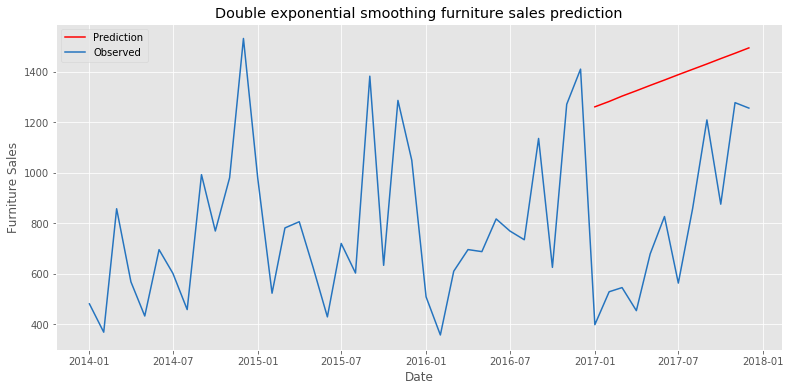

In [47]:
from pylab import rcParams
rcParams['figure.figsize'] = 13, 6
yhat_DES = DES_predict.values.tolist()
y = df.values.tolist()
plt.plot(DES_predict.index, yhat_DES, color='r',label='Prediction')
plt.plot(df.index, y, color='#2574BF',label='Observed')
plt.xlabel('Date')
plt.ylabel('Furniture Sales')
plt.legend()
plt.title('Double exponential smoothing furniture sales prediction')
plt.show()

In [48]:
def performance(y_true, y_pred): 
    #y_true, y_pred = np.array(y_true), np.array(y_pred)
    mse = ((y_pred - y_true) ** 2).mean()
    mape= np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return( print(' The MSE of forecasts is {}'.format(round(mse, 2))+
                  '\n The RMSE of forecasts is {}'.format(round(np.sqrt(mse), 2))+
                  '\n The MAPE of forecasts is {}'.format(round(mape, 2))))

In [49]:
performance(testset, yhat_DES)

 The MSE of forecasts is 404596.36
 The RMSE of forecasts is 636.08
 The MAPE of forecasts is 98.79


### Triple exponential smoothing

In [61]:
#Prediction with exponential smoothing + seasonality
from statsmodels.tsa.holtwinters import ExponentialSmoothing
#TES = ExponentialSmoothing(trainset, trend = 'add', seasonal = 'add', seasonal_periods = 12)
#TES_fit = TES.fit(smoothing_level=0.5)
TES = ExponentialSmoothing(trainset, trend='add', seasonal='add', seasonal_periods=12)

TES_fit = TES.fit(smoothing_level=0.5, optimized=True, use_boxcox=False, remove_bias=False)
TES_predict = TES_fit.predict(start=pd.to_datetime('2017-01-01'), end=pd.to_datetime('2017-12-01'))

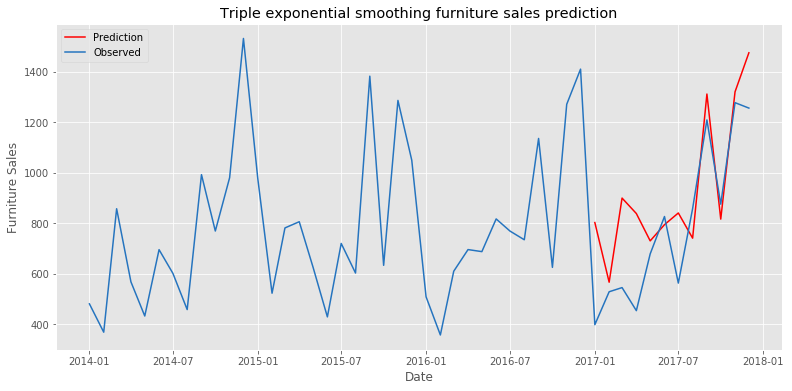

In [62]:
from pylab import rcParams
rcParams['figure.figsize'] = 13, 6
yhat_TES = TES_predict.values.tolist()
y = df.values.tolist()
plt.plot(TES_predict.index, yhat_TES, color='r',label='Prediction')
plt.plot(df.index, y, color='#2574BF',label='Observed')
plt.xlabel('Date')
plt.ylabel('Furniture Sales')
plt.legend()
plt.title('Triple exponential smoothing furniture sales prediction')
plt.show()

In [63]:
performance(testset, yhat_TES)

 The MSE of forecasts is 49846.48
 The RMSE of forecasts is 223.26
 The MAPE of forecasts is 30.81
